# Deep Learning and Neural Network - Question 1
## Arian Firoozi - 810100196
## Arman Majidi - 810100205

![University of Tehran logo](UTLogo\University_of_Tehran_logo.svg "University of Tehran")
![Engineering faculty of University of Tehran logo](UTLogo\Engineering_faculty_University_of_Tehran_logo.png "Engineering faculty")

# Outline
- [ 0 - Packages ](#0)
- [ 1 - MLP Design ](#1)
- [ 2 - Two Different Model Training ](#2)
- [ 3 - Backpropagation Algorithm ](#3)
- [ 4 - Different Hyperparameters Checking ](#4)

---

<a name="0"></a>
## 0 - Packages 

First, let's run the cell below to import all the packages.
- [numpy](https://numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [seanborn](https://seaborn.pydata.org) is a Python data visualization library based on matplotlib.
- [tensorflow](https://tensorflow.org) is an end-to-end platform for machine learning.
- [scikit-learn](https://scikit-learn.org) is a Python module for machine learning.
- [keras_tuner](https://keras.io/keras_tuner)  is an easy-to-use, scalable hyperparameter optimization framework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import keras_tuner as kt

---

<a name="1"></a>
## 1 - MLP Design

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
data_min = np.min(X_train, axis=0)
data_max = np.max(X_train, axis=0)
X_train = ((X_train - data_min) / (data_max - data_min)).astype(np.float64)
X_test = ((X_test - data_min) / (data_max - data_min)).astype(np.float64)

In [3]:
input_shape = X_train.shape[1:]
learning_rate = 0.001
model = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(10, activation='softmax')   
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
hist = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7405 - loss: 0.7600
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8379 - loss: 0.4742
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8528 - loss: 0.4387
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8582 - loss: 0.4218
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8622 - loss: 0.4185
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - loss: 0.4145
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8669 - loss: 0.4051
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8703 - loss: 0.3956
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8705 - loss: 0.3979
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.3942
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8713 - loss: 0.3934
Epoch 12/50
1875/1875 ━━━━━━━━

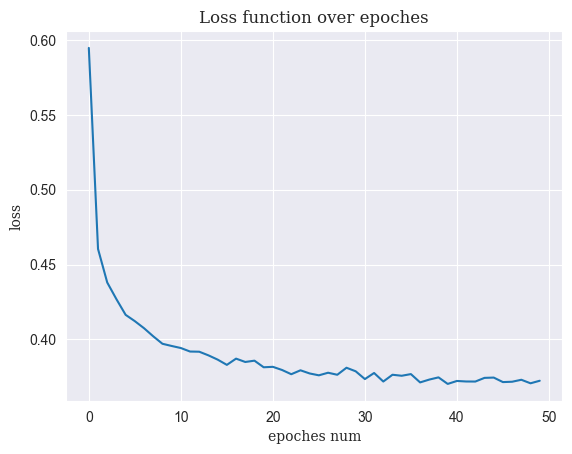

In [5]:
sns.set_style("darkgrid")
sns.lineplot(hist.history['loss'])
plt.title('Loss function over epoches', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

#### ◆ Confusion matrix

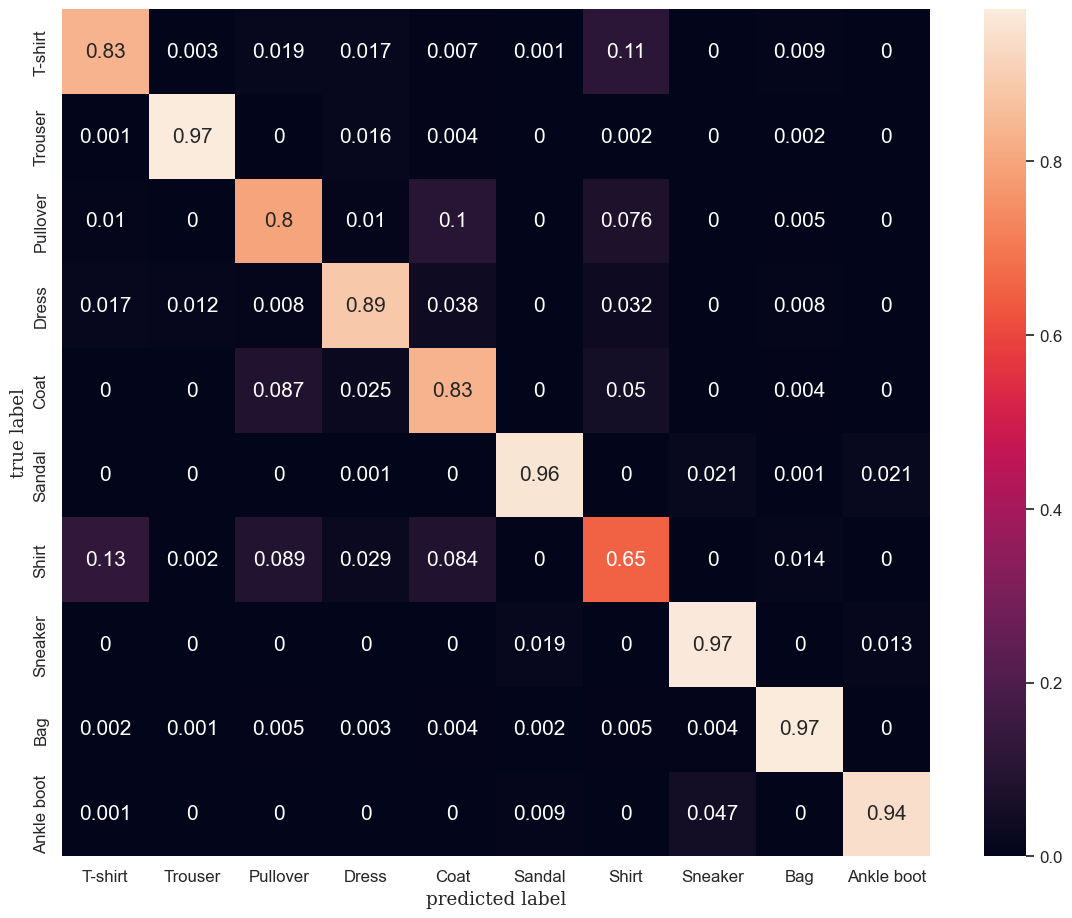

In [6]:
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_classes)
conf_mat = conf_mat.T / np.sum(conf_mat, axis=1)

plt.figure(figsize=(14, 11))
sns.set(font_scale=1.1) # for label size
labels = ["T-shirt", "Trouser", "Pullover", "Dress",
          "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sns.heatmap(conf_mat.T, xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 15})
plt.xlabel('predicted label', fontdict={'family':'serif'})
plt.ylabel('true label', fontdict={'family':'serif'})
plt.show()

#### ◆ Classes and most mistaken label

In [7]:
worst_class = np.argmax(conf_mat - np.diag(np.diag(conf_mat)), axis=0)
mapping = {0:"T-shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",
           5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
worst_labels = list(np.vectorize(mapping.get)(worst_class))
worst_labels

['Shirt',
 'Dress',
 'Coat',
 'Coat',
 'Pullover',
 'Sneaker',
 'T-shirt',
 'Sandal',
 'Pullover',
 'Sneaker']

#### ◆ Two most confused classes

In [8]:
two_worst_class = np.argmax(conf_mat + conf_mat.T - 2*np.diag(np.diag(conf_mat)))
two_worst_class = np.unravel_index(two_worst_class, conf_mat.shape)
two_worst_labels = list(np.vectorize(mapping.get)(two_worst_class))
two_worst_labels

['T-shirt', 'Shirt']

#### ◆ Increasing model complexity

Increasing the number of hidden layers or neurons allows the model to learn more complex representations and patterns from the data. However, it may also increase the risk of overfitting, especially if the model is too complex relative to the dataset size. The goal is to find a balance between model complexity and generalization.

#### ◆ Choosing best hyperparameters

One common method for selecting hyperparameters is Grid Search or Random Search. These approaches systematically evaluate different combinations of hyperparameters (like learning rate, regularization strength, number of neurons, etc.) and select the combination that provides the best validation accuracy. Additionally, more advanced techniques like Bayesian Optimization can also be used for more efficient hyperparameter tuning.

---

<a name="2"></a>
## 2 - Two Different Model Training

In [9]:
model1 = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')   
])
model1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2 = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(48, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    Dense(10, activation='softmax')   
])
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
hist1 = model1.fit(X_train, y_train, epochs=40, verbose=0)
hist2 = model2.fit(X_train, y_train, epochs=40, verbose=0)

In [11]:
model1_train = hist1.history['accuracy'][-1]
model1_test = model1.evaluate(X_test, y_test, verbose=0)
model2_train = hist2.history['accuracy'][-1]
model2_test = model2.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 accuracy on train data: {model1_train}\n\taccuracy on test data:  {model1_test[1]}\n\n')
print(f'Model 2 accuracy on train data: {model2_train}\n\taccuracy on test data:  {model2_test[1]}')

Model 1 accuracy on train data: 0.9431666731834412
	accuracy on test data:  0.8830000162124634


Model 2 accuracy on train data: 0.8709166646003723
	accuracy on test data:  0.8634999990463257


#### ◆ Histogram

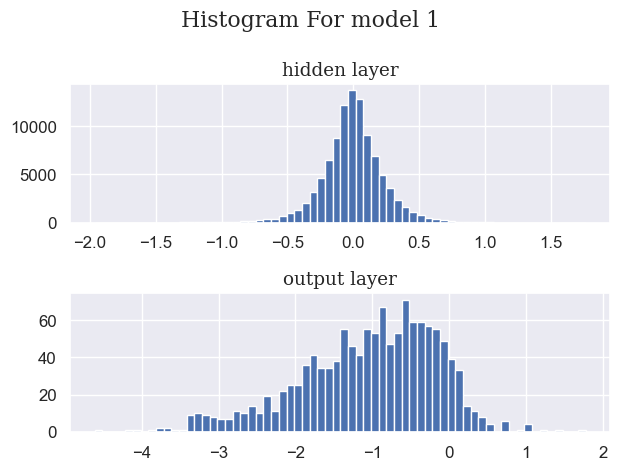

In [12]:
weights_hidden, bias_hidden, weights_last, bias_last = model1.weights
plt.suptitle('Histogram For model 1', fontdict={'family':'serif'})
plt.subplot(2, 1, 1)
plt.hist(np.array(weights_hidden.value).flatten(), bins=64)
plt.title('hidden layer', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.hist(np.array(weights_last.value).flatten(), bins=64)
plt.title('output layer', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

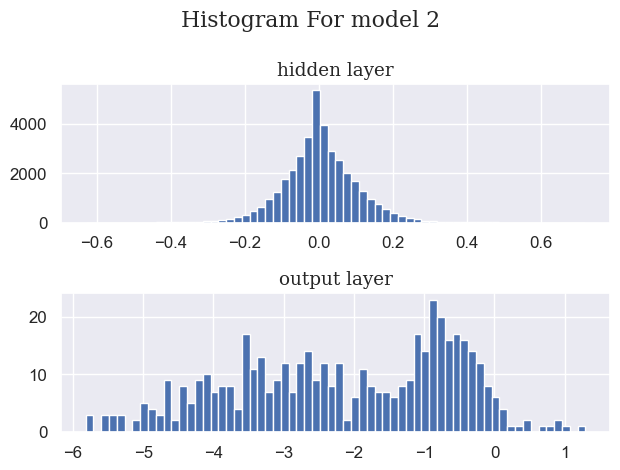

In [13]:
weights_hidden, bias_hidden, weights_last, bias_last = model2.weights
plt.suptitle('Histogram For model 2', fontdict={'family':'serif'})
plt.subplot(2, 1, 1)
plt.hist(np.array(weights_hidden.value).flatten(), bins=64)
plt.title('hidden layer', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.hist(np.array(weights_last.value).flatten(), bins=64)
plt.title('output layer', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

**<span style="color:red"> Difference Should be written </span>**

#### ◆ Model improvement

##### Adam optimizer

In [14]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
hist1 = model1.fit(X_train, y_train, epochs=40, verbose=0)
hist2 = model2.fit(X_train, y_train, epochs=40, verbose=0)

In [16]:
model1_train = hist1.history['accuracy'][-1]
model1_test = model1.evaluate(X_test, y_test, verbose=0)
model2_train = hist2.history['accuracy'][-1]
model2_test = model2.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 accuracy on train data: {model1_train}\n\taccuracy on test data:  {model1_test[1]}\n\n')
print(f'Model 2 accuracy on train data: {model2_train}\n\taccuracy on test data:  {model2_test[1]}')

Model 1 accuracy on train data: 0.968916654586792
	accuracy on test data:  0.8827999830245972


Model 2 accuracy on train data: 0.8826333284378052
	accuracy on test data:  0.873199999332428


##### RMSprop optimizer

In [17]:
model1.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
hist1 = model1.fit(X_train, y_train, epochs=40, verbose=0)
hist2 = model2.fit(X_train, y_train, epochs=40, verbose=0)

In [19]:
model1_train = hist1.history['accuracy'][-1]
model1_test = model1.evaluate(X_test, y_test, verbose=0)
model2_train = hist2.history['accuracy'][-1]
model2_test = model2.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 accuracy on train data: {model1_train}\n\taccuracy on test data:  {model1_test[1]}\n\n')
print(f'Model 2 accuracy on train data: {model2_train}\n\taccuracy on test data:  {model2_test[1]}')

Model 1 accuracy on train data: 0.9807500243186951
	accuracy on test data:  0.8877000212669373


Model 2 accuracy on train data: 0.8712999820709229
	accuracy on test data:  0.8589000105857849


**<span style="color:red"> Details Should be written </span>**

---

<a name="3"></a>
## 3 - Backpropagation Algorithm

In [20]:
model3 = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')   
])
initial_weights = model3.get_weights()

##### Without optimizer

In [21]:
model3.set_weights(initial_weights)
model3.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, epochs=30, verbose=0)

In [22]:
model3_train = hist3.history['accuracy'][-1]
model3_test = model3.evaluate(X_test, y_test, verbose=0)
print(f'Model accuracy on train data: {model3_train}\n{6*' '}accuracy on test data:  {model3_test[1]}')

Model accuracy on train data: 0.9077000021934509
      accuracy on test data:  0.8665000200271606


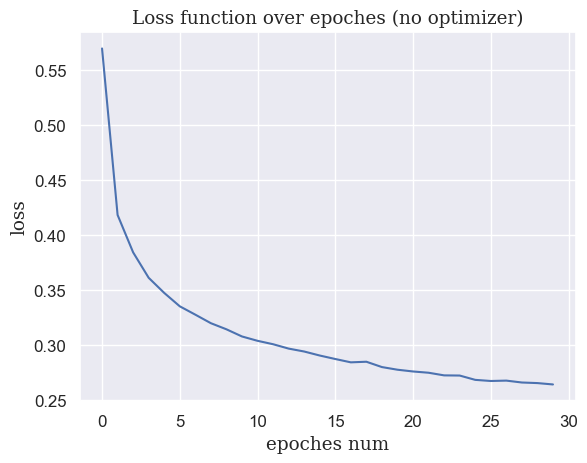

In [23]:
plt.plot(hist3.history['loss'])
plt.title('Loss function over epoches (no optimizer)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

##### Adam optimizer

In [24]:
model3.set_weights(initial_weights)
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, epochs=20, verbose=0)

In [25]:
model3_train = hist3.history['accuracy'][-1]
model3_test = model3.evaluate(X_test, y_test, verbose=0)
print(f'Model accuracy on train data: {model3_train}\n{6*' '}accuracy on test data:  {model3_test[1]}')

Model accuracy on train data: 0.9082833528518677
      accuracy on test data:  0.8765000104904175


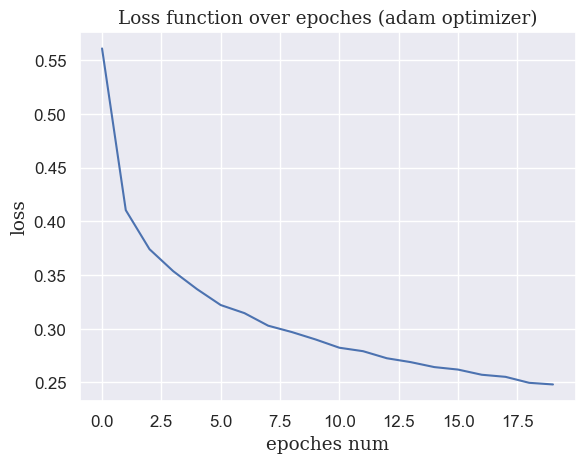

In [26]:
plt.plot(hist3.history['loss'])
plt.title('Loss function over epoches (adam optimizer)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

##### NAdam optimizer

In [27]:
model3.set_weights(initial_weights)
model3.compile(optimizer=keras.optimizers.Nadam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, epochs=20, verbose=0)

In [28]:
model3_train = hist3.history['accuracy'][-1]
model3_test = model3.evaluate(X_test, y_test, verbose=0)
print(f'Model accuracy on train data: {model3_train}\n{6*' '}accuracy on test data:  {model3_test[1]}')

Model accuracy on train data: 0.9068333506584167
      accuracy on test data:  0.8723000288009644


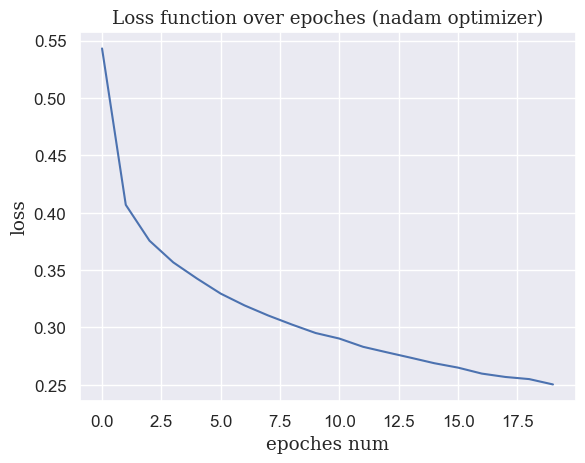

In [29]:
plt.plot(hist3.history['loss'])
plt.title('Loss function over epoches (nadam optimizer)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

##### RMSprop optimizer

In [30]:
model3.set_weights(initial_weights)
model3.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, epochs=20, verbose=0)

In [31]:
model3_train = hist3.history['accuracy'][-1]
model3_test = model3.evaluate(X_test, y_test, verbose=0)
print(f'Model accuracy on train data: {model3_train}\n{6*' '}accuracy on test data:  {model3_test[1]}')

Model accuracy on train data: 0.8997666835784912
      accuracy on test data:  0.8604999780654907


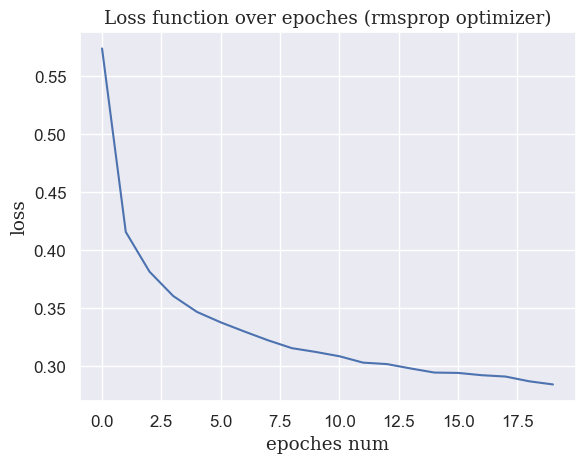

In [32]:
plt.plot(hist3.history['loss'])
plt.title('Loss function over epoches (rmsprop optimizer)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

#### ◆ Optimizers comparison

**<span style="color:red"> To Be Completed </span>**

#### ◆ Model Tuning

In [33]:
def create_model3(hp):
    model3 = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(hp.Choice('hiddenLayerUnits', values=[16, 32, 64]), activation='relu'),
        Dense(hp.Choice('hiddenLayerUnits', values=[8, 16, 32]), activation='relu'),
        Dense(10, activation='softmax')
    ])
    learning_rate = hp.Choice('learningRate', values=[1e-3, 5e-4, 1e-4])
    model3.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model3

##### Bayesian optimization

In [34]:
def create_model3(hp):
    hp_units = hp.Int('units', min_value=8, max_value=128, step=32)
    model3 = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(hp_units, activation='relu'),
        Dense(hp_units, activation='relu'),
        Dense(10, activation='softmax')
    ])
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling="log")
    model3.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model3

In [35]:
tunerBayesianOptimizer = kt.BayesianOptimization(
    create_model3,
    objective='accuracy',
    max_trials=10,
    directory='model3',
    project_name='bayesian_optimization'
)

In [36]:
tunerBayesianOptimizer.search(X_train, y_train, epochs=10)

Trial 10 Complete [00h 00m 29s]
accuracy: 0.9103333353996277

Best accuracy So Far: 0.9108666777610779
Total elapsed time: 00h 03m 56s


---

<a name="4"></a>
## 4 - Different Hyperparameters Checking

In [37]:
model4 = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
initial_weights = model4.get_weights()

##### Optimizer: Adam + Leaning rate: 0.01

In [38]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

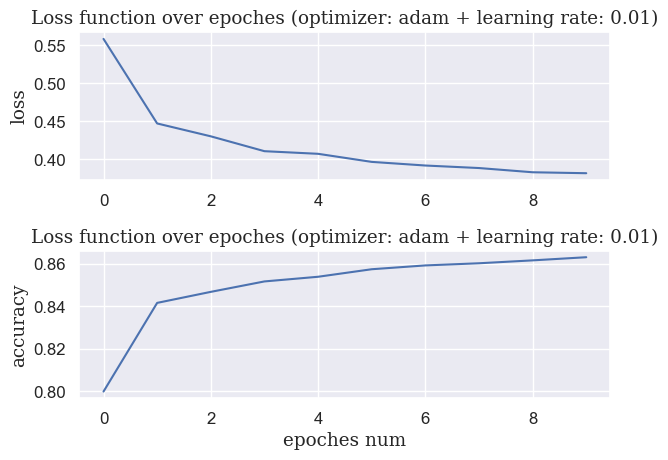

In [39]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.01)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.01)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Nadam + Leaning rate: 0.01

In [40]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.01),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

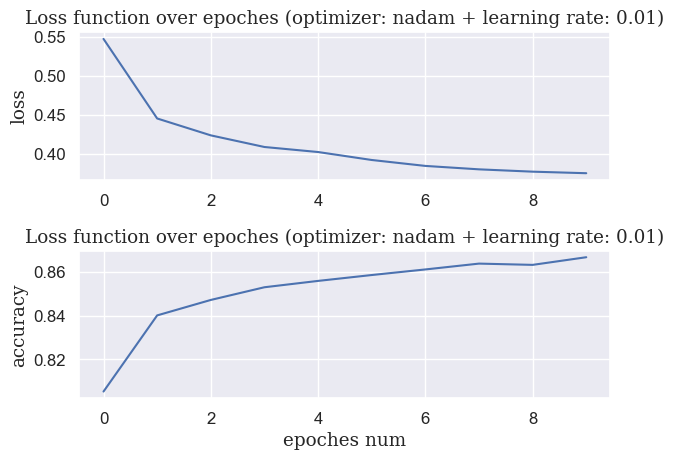

In [41]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.01)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.01)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: RMSprop + Leaning rate: 0.01

In [42]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

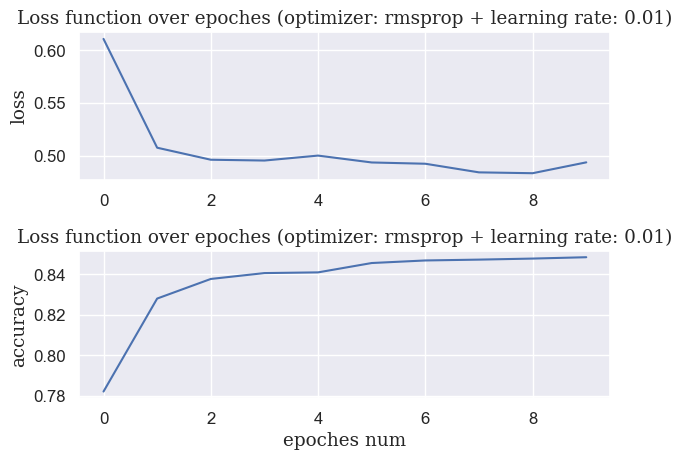

In [43]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.01)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.01)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Adam + Leaning rate: 0.005

In [44]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

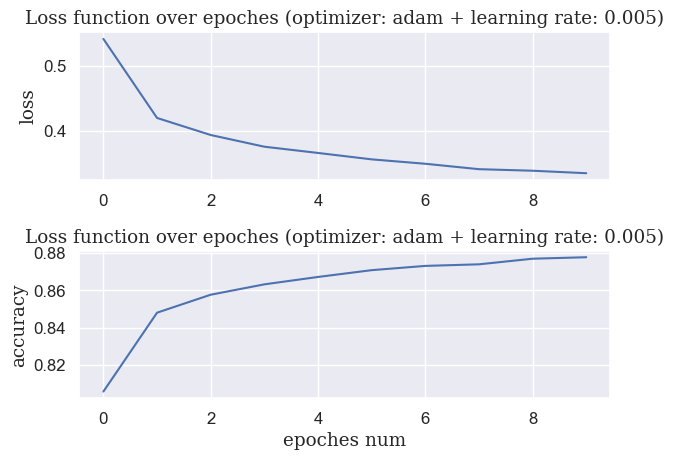

In [45]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.005)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.005)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Nadam + Leaning rate: 0.005

In [46]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.005),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

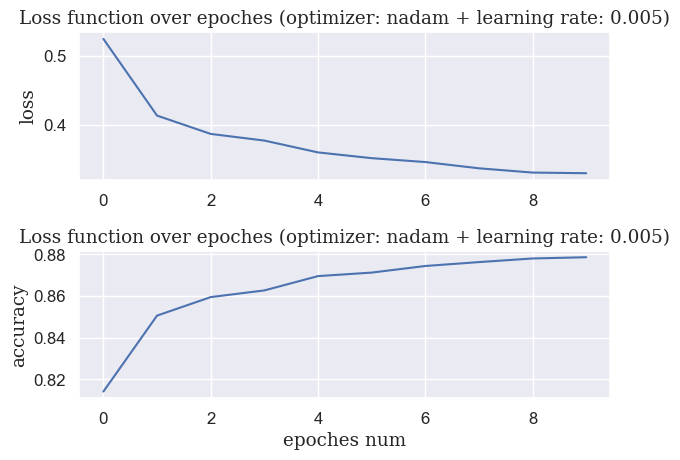

In [47]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.005)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.005)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: RMSprop + Leaning rate: 0.005

In [48]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.005),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

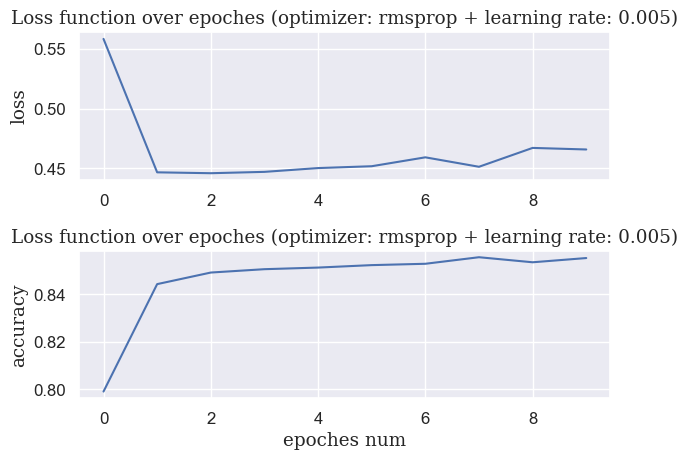

In [49]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.005)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.005)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Adam + Leaning rate: 0.001

In [50]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

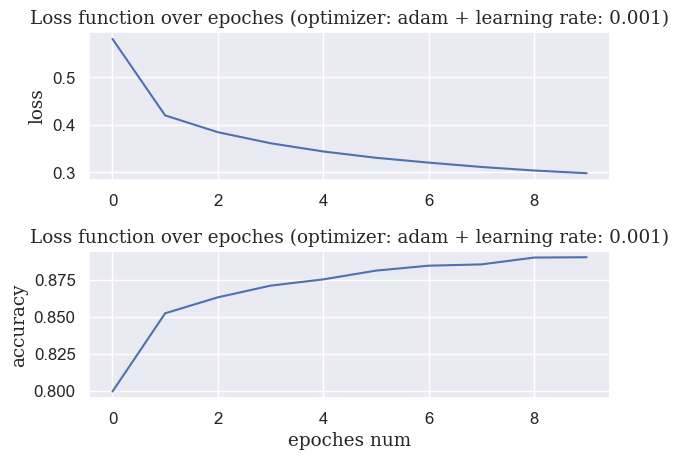

In [51]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.001)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.001)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Nadam + Leaning rate: 0.001

In [53]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

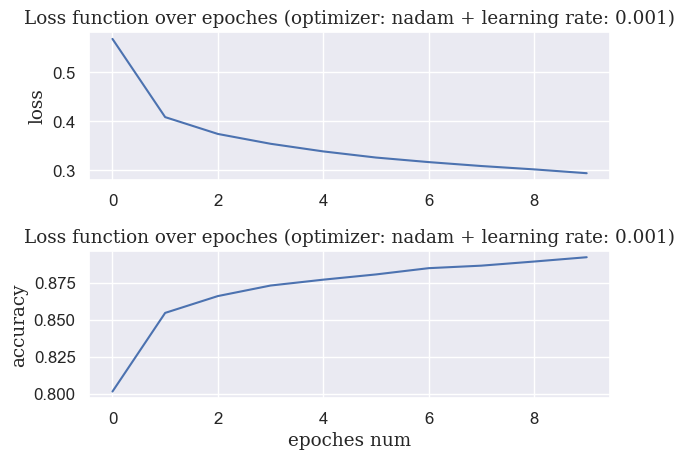

In [54]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.001)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.001)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: RMSprop + Leaning rate: 0.001

In [55]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

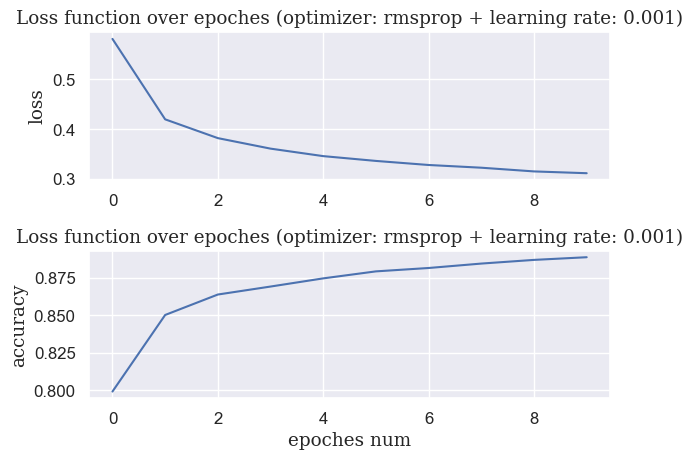

In [56]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.001)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.001)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Nadam + Leaning rate: 0.005 + Num. of layers: 2

In [57]:
model4 = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
model4.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.005),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

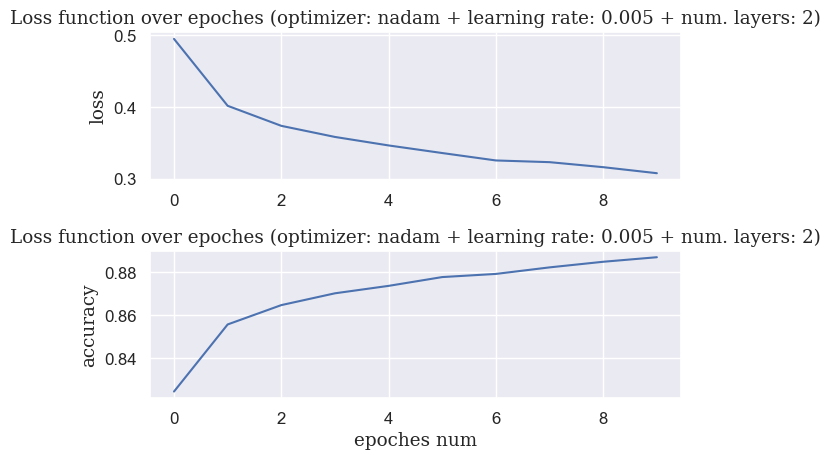

In [58]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.005 + num. layers: 2)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.005 + num. layers: 2)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

#### ◆ Hyperparameters Tuning

In [68]:
def create_model4(hp):
    model4 = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(hp.Choice('hiddenLayerUnits', values=[32, 64, 128]), activation='relu'),
        Dense(hp.Choice('finalLayerUnits', values=[16, 32, 64]), activation='relu'),
        Dense(10, activation='softmax')
    ])
    learning_rate = hp.Choice('learningRate', values=[1e-3, 5e-4, 1e-4])
    model4.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model4

##### Random search

In [69]:
tunerRandomSearch = kt.RandomSearch(
    create_model4,
    objective='accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='model4',
    project_name='random_search'
)

In [70]:
tunerRandomSearch.search(X_train, y_train, epochs=10)

Trial 10 Complete [00h 00m 18s]
accuracy: 0.8662999868392944

Best accuracy So Far: 0.9104333519935608
Total elapsed time: 00h 04m 18s


In [71]:
tunerRandomSearch.results_summary()

Results summary
Results in model4\random_search
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 02 summary
Hyperparameters:
hiddenLayerUnits: 128
finalLayerUnits: 64
learningRate: 0.0005
Score: 0.9104333519935608

Trial 06 summary
Hyperparameters:
hiddenLayerUnits: 128
finalLayerUnits: 32
learningRate: 0.001
Score: 0.9090333580970764

Trial 08 summary
Hyperparameters:
hiddenLayerUnits: 128
finalLayerUnits: 16
learningRate: 0.001
Score: 0.9084500074386597

Trial 05 summary
Hyperparameters:
hiddenLayerUnits: 128
finalLayerUnits: 32
learningRate: 0.0005
Score: 0.9078666567802429

Trial 00 summary
Hyperparameters:
hiddenLayerUnits: 64
finalLayerUnits: 64
learningRate: 0.0005
Score: 0.9033833146095276

Trial 07 summary
Hyperparameters:
hiddenLayerUnits: 64
finalLayerUnits: 32
learningRate: 0.001
Score: 0.9031999707221985

Trial 01 summary
Hyperparameters:
hiddenLayerUnits: 64
finalLayerUnits: 16
learningRate: 0.001
Score: 0.9016833305358887

Trial 04 summary
Hyperp

##### Grid search

In [72]:
tunerGridSearch = kt.GridSearch(
    create_model4,
    objective='accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='model4',
    project_name='grid_search'
)

In [73]:
tunerGridSearch.search(X_train, y_train, epochs=10)

Trial 10 Complete [00h 00m 23s]
accuracy: 0.9018833041191101

Best accuracy So Far: 0.9018833041191101
Total elapsed time: 00h 03m 06s


In [74]:
tunerGridSearch.results_summary()

Results summary
Results in model4\grid_search
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 09 summary
Hyperparameters:
hiddenLayerUnits: 64
finalLayerUnits: 16
learningRate: 0.001
Score: 0.9018833041191101

Trial 06 summary
Hyperparameters:
hiddenLayerUnits: 32
finalLayerUnits: 64
learningRate: 0.001
Score: 0.8973833322525024

Trial 03 summary
Hyperparameters:
hiddenLayerUnits: 32
finalLayerUnits: 32
learningRate: 0.001
Score: 0.894016683101654

Trial 07 summary
Hyperparameters:
hiddenLayerUnits: 32
finalLayerUnits: 64
learningRate: 0.0005
Score: 0.8924333453178406

Trial 04 summary
Hyperparameters:
hiddenLayerUnits: 32
finalLayerUnits: 32
learningRate: 0.0005
Score: 0.8916166424751282

Trial 00 summary
Hyperparameters:
hiddenLayerUnits: 32
finalLayerUnits: 16
learningRate: 0.001
Score: 0.886900007724762

Trial 01 summary
Hyperparameters:
hiddenLayerUnits: 32
finalLayerUnits: 16
learningRate: 0.0005
Score: 0.8831999897956848

Trial 08 summary
Hyperparameter

**<span style="color:red"> To Be Completed </span>**

#### ◆ Confusion Matrix Comparison

##### Best model via Tuning

In [75]:
RandomSearch_best_model = tunerRandomSearch.get_best_models(num_models=1)[0]
RandomSearch_history = RandomSearch_best_model.fit(X_train, y_train, epochs=50, verbose=0)

C:\Users\arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


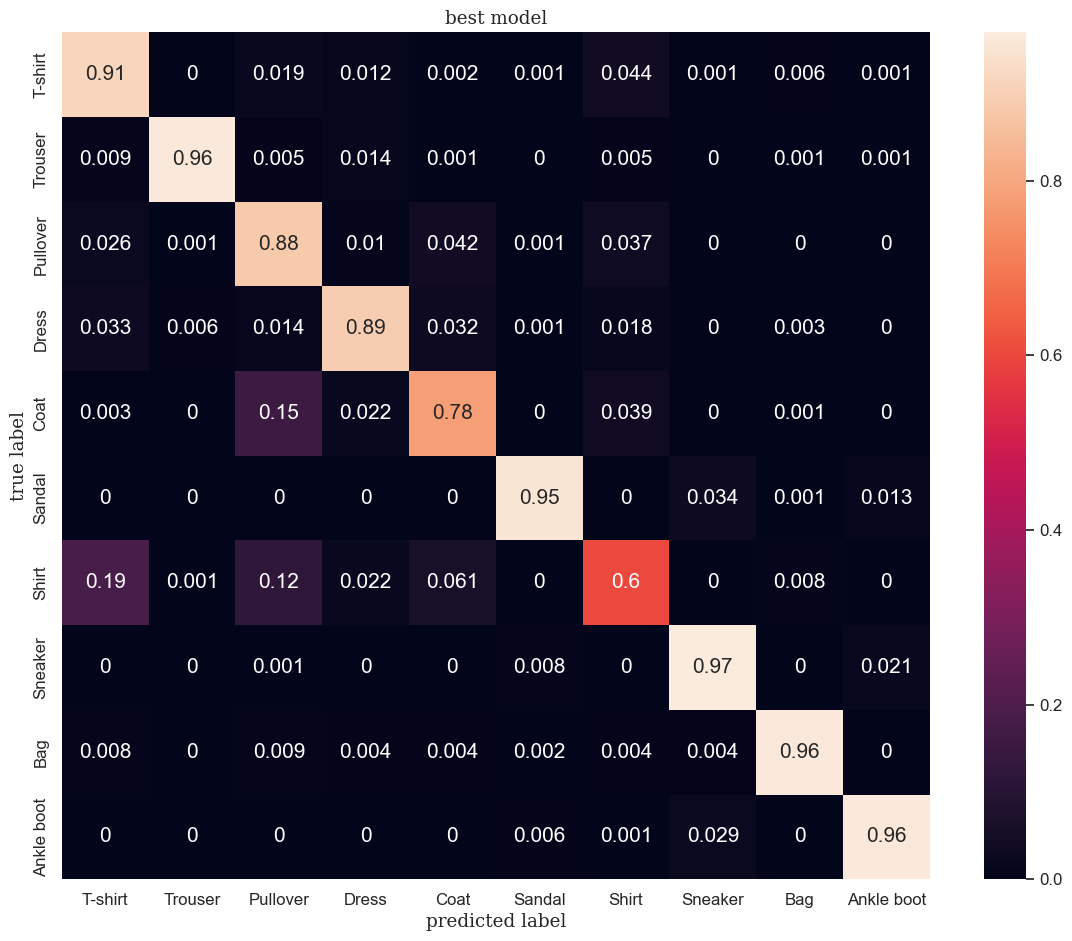

In [76]:
y_pred = RandomSearch_best_model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_classes)
conf_mat = conf_mat.T / np.sum(conf_mat, axis=1)

plt.figure(figsize=(14, 11))
sns.set(font_scale=1.1)
sns.heatmap(conf_mat.T, xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 15})
plt.title('best model', fontdict={'family':'serif'})
plt.xlabel('predicted label', fontdict={'family':'serif'})
plt.ylabel('true label', fontdict={'family':'serif'})
plt.show()

In [77]:
GridSearch_best_model = tunerGridSearch.get_best_models(num_models=1)[0]
GridSearch_history = GridSearch_best_model.fit(X_train, y_train, epochs=50, verbose=0)

C:\Users\arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


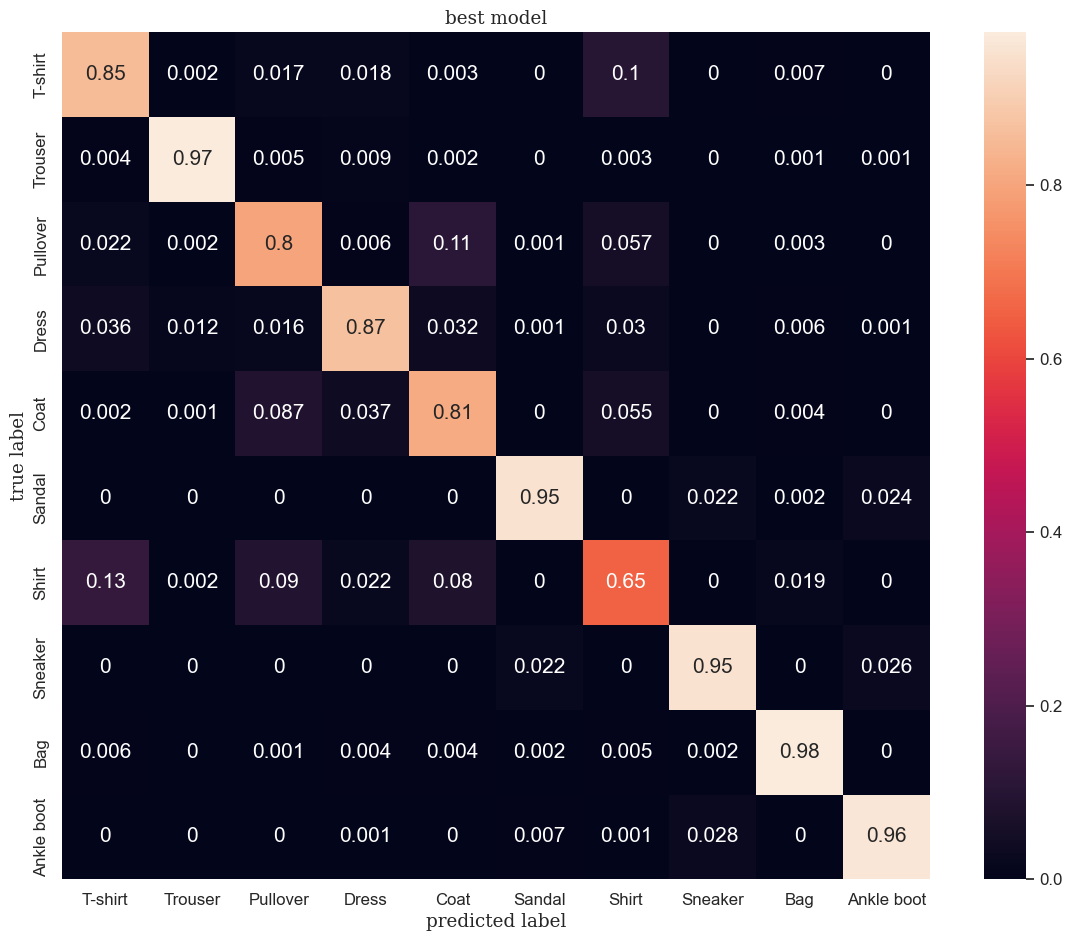

In [78]:
y_pred = GridSearch_best_model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_classes)
conf_mat = conf_mat.T / np.sum(conf_mat, axis=1)

plt.figure(figsize=(14, 11))
sns.set(font_scale=1.1)
sns.heatmap(conf_mat.T, xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 15})
plt.title('best model', fontdict={'family':'serif'})
plt.xlabel('predicted label', fontdict={'family':'serif'})
plt.ylabel('true label', fontdict={'family':'serif'})
plt.show()

**<span style="color:red"> To Be Completed </span>**

---